## Problem statement
### The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.
* Problem statement is not straight forward - You can convert the multi class problem to binary class problem looking at the link under the source.

## Source

https://archive.ics.uci.edu/ml/datasets/HCV+data
    
Creators: Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann
Donor: Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; lichtinghagen.ralf '@' mh-hannover.de
Donor: Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; frank.klawonn '@' helmholtz-hzi.de
Donor: Georg Hoffmann; Trillium GmbH; Grafrath, Germany; georg.hoffmann '@' trillium.de

Citation Request:
Please refer to the Machine Learning Repository's citation policy

##### Attributes and the number of missing values in each column
* Category 0 - (Target)
* Age 0
* Sex 0
* ALB Albumin blood 1
* ALP Alkaline phosphatase 18
* ALT Alanine Aminotransferase 1
* AST Aspartate Aminotransferase 0
* BIL Bilirubin 0
* CHE Cholinesterase 0
* CHOL Cholesterol 10
* CREA Creatinine 0
* GGT Gamma-Glutamyl Transferase 0
* PROT Protein 1

Learning outcome from this assignment
* Able to build a simple Neural network model 
* Understand the layers, activation functions, epochs and learning rate

## Task1
    1.1 Read the data and print the the dimensions of data
    Read the dataset with path "./Data/hcvdata.csv" and name your dataframe as datadf    
    1.2 Subset the relevant columns from the dataframe and check the distribution of Target 
    1.3 Redefine the class labels

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# 1.1 Read the data and print the the dimensions of data
# Please remember to name the dataframe as "datadf", else this test case will not work.
### BEGIN SOLUTION
datadf=pd.read_csv("./hcvdata.csv")
#print(datadf.shape)
### END SOLUTION


In [4]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 1.
    """
### BEGIN HIDDEN TESTS
assert(datadf.shape == (615,14))
### END HIDDEN TESTS

In [5]:
# 1.2 Subset the relevant columns from the dataframe and check the distribution of Target.
### BEGIN SOLUTION
datadf.drop(['Unnamed: 0'],axis=1,inplace=True)
print(datadf['Category'].value_counts())
### END SOLUTION


0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64


In [6]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 1.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 1.
    Please remember to name the dataframe as datadf, else this test case will not work."""

### BEGIN HIDDEN TESTS
assert(datadf.shape == (615,13))
assert(datadf['Category'].value_counts().index[0] == '0=Blood Donor')
assert(datadf['Category'].value_counts()[0] == 533)
assert(datadf['Category'].value_counts().index[2] == '1=Hepatitis')
assert(datadf['Category'].value_counts()[2] == 24)
### END HIDDEN TESTS

* You see there are four classes in the Target Category column. Convert the problem into two classes as Blood Donors(0) vs Hepatitis-C(1).  Include Hepatitis Cm Fibrosis and Cirrhosis under class1

In [7]:
# 1.3 Replace (Blood donors with 0 , (Hepatitis C, Fibrosis, Cirrhosis) with 1)
### BEGIN SOLUTION
datadf.Category.replace(["0=Blood Donor","0s=suspect Blood Donor","1=Hepatitis","2=Fibrosis","3=Cirrhosis"],[0,0,1,1,1],inplace=True)
### END SOLUTION

In [8]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 1.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 1.
    Please remember to name the dataframe as datadf, else this test case will not work."""

### BEGIN HIDDEN TESTS
assert (datadf.Category.value_counts()[0] == 540)
assert (datadf.Category.value_counts()[1] == 75)
### END HIDDEN TESTS

# Task 2
* 2.1 Check the missing values in the data , Impute if there are any.
* 2.2 Dummify the Sex variable in the given data - Create datadf_dummy
* 2.3 Split the data into train and test 70:30 ratio
* 2.4 Separate X and Y from train and test

In [9]:
# 2.1 Check the missing values in the data , Impute if there are any.
### BEGIN SOLUTION
#2.1_2 Impute if there are any.
datadf.loc[datadf['ALT'].isna(),'ALT']=datadf['ALT'].mean()
datadf.loc[datadf['ALB'].isna(),'ALB']=datadf['ALB'].mean()
datadf.loc[datadf['ALP'].isna(),'ALP']=datadf['ALP'].mean()
datadf.loc[datadf['CHOL'].isna(),'CHOL']=datadf['CHOL'].mean()
datadf.loc[datadf['PROT'].isna(),'PROT']=datadf['PROT'].mean()
### END SOLUTION

In [10]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 2.
    Please  finish previous tasks before to this cell/section else you will miss the grade point for Task - 2.
    Please remember to name the dataframe as datadf, else this test case will not work."""
### BEGIN HIDDEN TESTS
assert(datadf.isna().sum().sum() == 0)
assert(datadf.shape == (615,13))
### END HIDDEN TESTS

In [11]:
# 2.2 Dummify the Sex variable in the given data - Create datadf_dummy using pd.get_dummies()

### BEGIN SOLUTION
datadf['Sex']=datadf['Sex'].astype('category')
datadf_dummy=pd.concat([datadf,pd.get_dummies(datadf['Sex'])],axis=1)
datadf_dummy.drop('Sex',axis=1,inplace=True)
print(datadf_dummy.columns)
###  END SOLUTION

Index(['Category', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL',
       'CREA', 'GGT', 'PROT', 'f', 'm'],
      dtype='object')


In [12]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 2.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 2.
    Please remember to name the dataframe as datadf_dummy, else this test case will not work."""
### BEGIN HIDDEN TESTS
#assert(datadf_dummy.shape == (615,14))
assert('m' in datadf_dummy.columns)
assert('f' in datadf_dummy.columns)
assert(~('Sex' in datadf_dummy.columns) == -1)
### END HIDDEN TESTS

In [13]:
#  2.3 Split the data into train and test 70:30 ratio
from sklearn.model_selection import train_test_split
def splitData(temp):
    ### BEGIN SOLUTION
    traindata,testdata=train_test_split(temp,test_size=0.3,stratify=temp['Category'],random_state=123)
    return traindata,testdata
    ### END SOLUTION
traindata,testdata=splitData(datadf_dummy)
print(traindata.shape)
print(testdata.shape)

(430, 14)
(185, 14)


In [14]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 2.
    Please finish previous tasks before this cell/section else you will miss the grade point for Task - 2.
    Please remember to name the dataframe as datadf_dummy, else this test case will not work."""
### BEGIN HIDDEN TESTS
from nose.tools import assert_equal
assert_equal(splitData(datadf_dummy)[0].shape,(430,14))
assert_equal(splitData(datadf_dummy)[1].shape,(185,14))
### END HIDDEN TESTS

In [15]:
# 2.4 Write a function to return X and Y from traindata and testdata
def splitDataX_Y(temp):
    ### BEGIN SOLUTION
    X=temp.iloc[:,1:14]
    Y=temp.iloc[:,0:1]
    return X,Y
    ### END SOLUTION
X_train,Y_train=splitDataX_Y(traindata)
X_test,Y_test=splitDataX_Y(testdata)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(430, 13)
(430, 1)
(185, 13)
(185, 1)


In [16]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 2.
    Please finish previous tasks before this cell/section else you will miss the grade point for Task - 2.
    Please use the created datasets in the future cells, else this test cases will not work."""
### BEGIN HIDDEN TESTS
from nose.tools import assert_equal
assert_equal(X_train.shape,(430, 13))
assert_equal(Y_train.shape,(430,1))
assert_equal(X_test.shape,((185,13)))
assert_equal(Y_test.shape,((185,1)))
assert_equal(np.sort(np.unique(Y_train))[0],0)
assert_equal(np.sort(np.unique(Y_train))[1],1)
assert_equal(np.sort(np.unique(Y_test))[0],0)
assert_equal(np.sort(np.unique(Y_test))[1],1)
### END HIDDEN TESTS

# Task3
* 3.1 Build a Neuranet using sequential model, compile and fit the model. 
    * 3.1.1 Define a  model with 2 Layers first one with  with 2 neurons,activation function as 'relu' with default kernel intitilizer, an output layer with an activation function as sigmoid
    * 3.1.2 Define Optimizer with learning rate 0.01 and Compile the model with metrics as accuracy/Recall and loss='binary_crossentropy'.
    * 3.1.3 Fit the model and store history  varaible- batchsize=1,epochs=10.
* 3.2 Plot the error of train and test.
* 3.3 Calculate the accuracy,F1 score on train and test

In [17]:
# Import all necessary modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import softmax,relu
from keras.optimizers import Adam,SGD
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score

Using TensorFlow backend.


In [18]:
# 3.1.1 Define a model with 2 Layers first one with 2 neurons, activation function as 'relu' with default kernel initializer, an output layer with an activation function as sigmoid

def model_base(number_cols):
    ### BEGIN SOLUTION
    model=Sequential()
    model.add(Dense(2,input_shape=(number_cols,),activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Dense(2,activation='sigmoid'))
    return model
    ### END SOLUTION
basemodel=model_base(X_train.shape[1])
basemodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [19]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 3.
    Please finish finish previous tasks before to this cell/section else you will miss the grade point for Task - 3.
    Please do not change the model name 'basemodel' , else this test case will not work."""
### BEGIN HIDDEN TESTS 
from nose.tools import assert_equal
assert_equal(len(model_base(X_train.shape[1]).layers),2)
assert_equal(model_base(X_train.shape[1]).layers[0].get_config()['activation'],'relu')
assert_equal(model_base(X_train.shape[1]).layers[1].get_config()['activation'],'sigmoid')
assert_equal(model_base(X_train.shape[1]).layers[0].get_config()['batch_input_shape'],(None, X_train.shape[1]))
### END HIDDEN TESTS 

In [20]:
# 3.1.2 Define Optimizer with learning rate 0.01 and compile the model with metrics as accuracy and loss='binary_crossentropy'.
### BEGIN SOLUTION
opt=keras.optimizers.Adam(learning_rate=0.01)
basemodel.compile(optimizer=opt,metrics=['accuracy'],loss='binary_crossentropy')
### END SOLUTION

In [21]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 3.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 3.
    else this test case will not work."""
### BEGIN HIDDEN TESTS 
assert(basemodel.loss == 'binary_crossentropy')
assert(len(basemodel.layers) == 2)
assert(np.round_(basemodel.optimizer.get_config()['learning_rate'],decimals=2) == 0.01)
### END HIDDEN TESTS 

In [22]:
#3.1.3 Fit the model and store history variable, batchsize=1 and epochs=10.
# e.g. history = model.fit() (fit the model on traindata with the following parameters epochs=10, validation_data, batch_size=1). 
# Make sure to convert the y as categorical while fitting the model.

### BEGIN SOLUTION
from matplotlib import pyplot as plt
history=basemodel.fit(X_train,keras.utils.to_categorical(Y_train),epochs=10,validation_data=(X_test,keras.utils.to_categorical(Y_test)),batch_size=1)
### END SOLUTION

Train on 430 samples, validate on 185 samples
Epoch 1/10
430/430 [==============================] - 1s 2ms/step - loss: 2.0816 - accuracy: 0.8419 - val_loss: 0.3855 - val_accuracy: 0.8757
Epoch 2/10
430/430 [==============================] - 1s 1ms/step - loss: 0.3728 - accuracy: 0.8791 - val_loss: 0.3756 - val_accuracy: 0.8757
Epoch 3/10
430/430 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8791 - val_loss: 0.3755 - val_accuracy: 0.8757
Epoch 4/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8791 - val_loss: 0.3755 - val_accuracy: 0.8757
Epoch 5/10
430/430 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8791 - val_loss: 0.3759 - val_accuracy: 0.8757
Epoch 6/10
430/430 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8791 - val_loss: 0.3756 - val_accuracy: 0.8757
Epoch 7/10
430/430 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8791 - 

In [23]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 3.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 3.
    Plesae use the given parameter values for epochs and batch_size only or else this test case will not work."""
### BEGIN HIDDEN TESTS 
#assert(history.params['batch_size'] == 1)
assert(history.params['epochs'] == 10)
assert(np.round_(basemodel.optimizer.get_config()['learning_rate'],decimals=2) ==0.01)
### END HIDDEN TESTS 

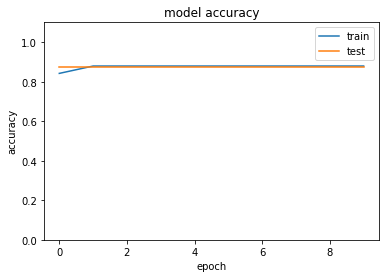

In [24]:
# 3.2 plot the train accuracy and val_accuracy (validation accuracy) using history variable. Explore history.
from matplotlib import pyplot as plt
def plthistory(historyrep):
    plt.plot(historyrep.history['accuracy'])
    plt.plot(historyrep.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.ylim(0,1.1)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show(True)

plthistory(history)

In [25]:
# 3.3 Write a function to predict the classes and return accuracy and f1score ; pass the following parameters 
# model, X and Y
def getmetrics(model_param1,data_param2,data_param3):
    ### BEGIN SOLUTION
    preds=model_param1.predict_classes(data_param2)
    acc=accuracy_score(data_param3,preds)
    f1score=f1_score(data_param3,preds)
    return acc,f1score
    ### END SOLUTION
print(getmetrics(basemodel,X_train,Y_train))
print(getmetrics(basemodel,X_test,Y_test))

(0.8790697674418605, 0.0)
(0.8756756756756757, 0.0)


In [26]:
print(getmetrics(basemodel,X_train,Y_train))
print(getmetrics(basemodel,X_test,Y_test))

(0.8790697674418605, 0.0)
(0.8756756756756757, 0.0)


In [27]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 3.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 3.
    Plesae use the given parameter values for epochs and batch_size only or else this test case will not work."""
### BEGIN HIDDEN TESTS 
assert(getmetrics(basemodel,X_train,Y_train)[0]>=0.75 and getmetrics(basemodel,X_train,Y_train)[0]<=1.0)
assert(getmetrics(basemodel,X_test,Y_test)[0]>0.75)
### END HIDDEN TESTS 

## Task4
* 4.1 Standardize the data using z score -
* 4.2 Build a Neuranet using sequential model, compile and fit the model.
    * 4.2.1 Define a model with 2 Layers first one with with 2 neurons,activation function as 'relu' with default kernel intitilizer, an output layer with an activation function as sigmoid.
    * 4.2.2 Define Optimizer with learning rate 0.01 and Compile the model with metrics as accuracy/Recall and loss='binary_crossentropy'.
    * 4.2.3 Fit the model and store history varaible- batchsize=1,epochs=10.
* 4.3 Plot the error of train and test.
* 4.4 Calculate the accuracy,F1 score on train and test

In [28]:
# 4.1 Standardize the numerical data - Write a function to return standardized data(X variables of train and test) using z score 
from sklearn.preprocessing import StandardScaler
def std_data(temp1,temp2):
    ### BEGIN SOLUTION
    standardizer = StandardScaler()
    temp1.iloc[:,0:11]=standardizer.fit_transform(temp1.iloc[:,0:11])
    temp2.iloc[:,0:11]=standardizer.transform(temp2.iloc[:,0:11])
    return temp1,temp2
    ### END SOLUTION
Xtrain_std,Xtest_std=std_data(X_train.copy(),X_test.copy())


In [29]:
Xtrain_std,Xtest_std=std_data(X_train.copy(),X_test.copy())
print(Xtrain_std.shape)
print(Xtest_std.shape)

(430, 13)
(185, 13)


In [30]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 4.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 4.
    else this test case will not work."""
### BEGIN HIDDEN TESTS
from nose.tools import assert_equal
assert_equal(np.round_(Xtrain_std.iloc[:,0].mean()),0.0)
assert_equal(np.round_(Xtest_std.iloc[:,0].mean()),0.0)
### END HIDDEN TESTS

In [31]:
# 4.2.1 Define a model with name 'model_std' with 2 Layers first one with with 2 neurons,activation function as 'relu' with default kernel intitilizer, an output layer with an activation function as sigmoid.
### BEGIN SOLUTION
model_std=model_base(Xtrain_std.shape[1])
model_std.summary()
### END SOLUTION

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 28        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 6         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [32]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 4.
    Please finish  previous tasks before to this cell/section else you will miss the grade point for Task - 4.
    Please do not change the model name 'basemodel' , else this test case will not work."""
### BEGIN HIDDEN TESTS 
assert_equal(len(model_std.layers),2)
assert_equal(model_std.layers[0].get_config()['activation'],'relu')
assert_equal(model_std.layers[1].get_config()['activation'],'sigmoid')
assert_equal(model_std.layers[0].get_config()['batch_input_shape'],(None, Xtrain_std.shape[1]))

### END HIDDEN TESTS 

In [33]:
# 4.2.2 Define Optimizer with learning rate 0.01 and Compile the model with metrics as accuracy/Recall and loss='binary_crossentropy'.
# 4.2.3 Fit the model and store history variable -'history_std' batchsize=1,epochs=10
# Make sure to convert the target to category
### BEGIN SOLUTION
opt=keras.optimizers.Adam(learning_rate=0.01)
model_std.compile(optimizer=opt,metrics=['accuracy'],loss='binary_crossentropy')
history_std=model_std.fit(Xtrain_std,keras.utils.to_categorical(Y_train),epochs=10,validation_data=(Xtest_std,keras.utils.to_categorical(Y_test)),batch_size=1)
### END SOLUTION

Train on 430 samples, validate on 185 samples
Epoch 1/10
430/430 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8907 - val_loss: 0.2392 - val_accuracy: 0.9081
Epoch 2/10
430/430 [==============================] - 1s 2ms/step - loss: 0.1639 - accuracy: 0.9349 - val_loss: 0.1415 - val_accuracy: 0.9459
Epoch 3/10
430/430 [==============================] - 1s 2ms/step - loss: 0.1239 - accuracy: 0.9581 - val_loss: 0.1260 - val_accuracy: 0.9541
Epoch 4/10
430/430 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9593 - val_loss: 0.1076 - val_accuracy: 0.9595
Epoch 5/10
430/430 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9663 - val_loss: 0.0985 - val_accuracy: 0.9730
Epoch 6/10
430/430 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.96 - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9663 - val_loss: 0.0981 - val_accuracy: 0.9730
Epoch 7/10
430/430 [==============================] - 1s 2ms

In [34]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 4.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 4.
    else this test case will not work."""
### BEGIN HIDDEN TESTS 
assert(basemodel.loss == 'binary_crossentropy')
assert(len(basemodel.layers) == 2)
assert(np.round_(basemodel.optimizer.get_config()['learning_rate'],decimals=2) == 0.01)
#assert(history_std.params['batch_size'] == 1)
assert(history_std.params['epochs'] == 10)
### END HIDDEN TESTS 

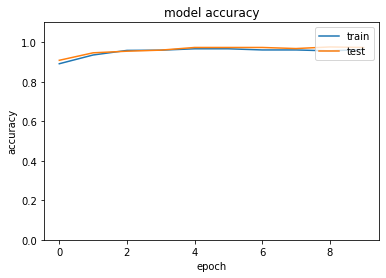

In [35]:
# Plot the error of train and test.
plthistory(history_std)

In [36]:
# Calculate the accuracy, F1 score on train and test
print(getmetrics(model_std,Xtrain_std,Y_train))
print(getmetrics(model_std,Xtest_std,Y_test))

(0.9627906976744186, 0.8297872340425532)
(0.972972972972973, 0.8837209302325583)


In [37]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 4.
    Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 4.
    Plesae use the given parameter values for epochs and batch_size only or else this test case will not work."""
### BEGIN HIDDEN TESTS 
assert(getmetrics(model_std,Xtrain_std,Y_train)[0]>=0.90 and getmetrics(model_std,Xtrain_std,Y_train)[0]<=1.0)
assert(getmetrics(model_std,Xtrain_std,Y_train)[1]>=0.80 and getmetrics(model_std,Xtrain_std,Y_train)[1]<=1.0)
assert(getmetrics(model_std,Xtest_std,Y_test)[0]>=0.90 and getmetrics(model_std,Xtest_std,Y_test)[0]<=1.0)
assert(getmetrics(model_std,Xtest_std,Y_test)[1]>=0.75 and getmetrics(model_std,Xtest_std,Y_test)[1]<=1.0)
### END HIDDEN TESTS 

### Task5
* 5.1 Build a Neuranet using sequential model, compile and fit the model.
    * 5.1.1 Define a model with the name 'model2' with 2 Layers first one with 5 neurons, activation function as 'relu' with default kernel intitilizer, an output layer with an activation function as sigmoid.
    * 5.1.2 Define Optimizer with learning rate 0.01 and compile the model with metrics as accuracy and loss='binary_crossentropy'.
    * 5.1.3 Fit the model and store history variable- batchsize=1,epochs=10.
    * 5.1.4 Plot the error of train and test.
* 5.2 Calculate the accuracy, F1 score on train and test

Train on 430 samples, validate on 185 samples
Epoch 1/20
430/430 [==============================] - 1s 2ms/step - loss: 0.2387 - accuracy: 0.9023 - val_loss: 0.1833 - val_accuracy: 0.9351
Epoch 2/20
430/430 [==============================] - 1s 1ms/step - loss: 0.1032 - accuracy: 0.9663 - val_loss: 0.1685 - val_accuracy: 0.9378
Epoch 3/20
430/430 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9663 - val_loss: 0.1477 - val_accuracy: 0.9378
Epoch 4/20
430/430 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9756 - val_loss: 0.1108 - val_accuracy: 0.9595
Epoch 5/20
430/430 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9767 - val_loss: 0.1254 - val_accuracy: 0.9486
Epoch 6/20
430/430 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9779 - val_loss: 0.1089 - val_accuracy: 0.9622
Epoch 7/20
430/430 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9826 - 

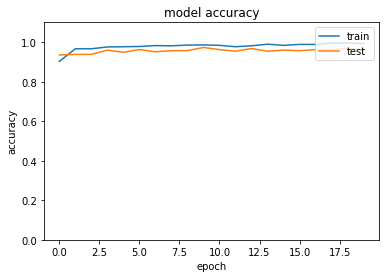

(0.9930232558139535, 0.9702970297029703)
(0.9567567567567568, 0.7999999999999999)


In [38]:
# 5.1 Build a Neural network using Sequential model, compile and fit the model with your choice of parameters.
# 5.1.1 Define a model 'model2' 
# 5.1.2 Define Optimizer, compile the model
# 5.1.3 Fit the model and store history variable
# 5.1.4 Plot the error of train and test
# 5.1.5 Calculate the accuracy and f1 score on train and test

# BEGIN SOLUTION
model2=Sequential()
model2.add(Dense(5,input_shape=(Xtrain_std.shape[1],),activation='relu',kernel_initializer='glorot_uniform'))
model2.add(Dense(2,activation='sigmoid'))

opt=keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=opt,metrics=['accuracy'],loss='binary_crossentropy')
history_2=model2.fit(Xtrain_std,keras.utils.to_categorical(Y_train),epochs=20,validation_data=(Xtest_std,keras.utils.to_categorical(Y_test)),batch_size=1)
plthistory(history_2)
# END SOLUTION
print(getmetrics(model2,Xtrain_std,Y_train))
print(getmetrics(model2,Xtest_std,Y_test))

In [39]:
""" Please do not delete this cell/section. It is there to validate your work for Task - 5.
    Make sure to use the name of the model as 'model2'. Please finish previous tasks before to this cell/section else you will miss the grade point for Task - 5.
    else this test case will not work."""
### BEGIN HIDDEN TESTS 
assert(getmetrics(model2,Xtrain_std,Y_train)[0]>=0.9 and getmetrics(model_std,Xtrain_std,Y_train)[0]<=1.0)
assert(getmetrics(model2,Xtrain_std,Y_train)[1]>=0.8 and getmetrics(model_std,Xtrain_std,Y_train)[1]<=1.0)
assert(getmetrics(model2,Xtest_std,Y_test)[0]>=0.9 and getmetrics(model_std,Xtest_std,Y_test)[0]<=1.0)
assert(getmetrics(model2,Xtest_std,Y_test)[1]>=0.7 and getmetrics(model_std,Xtest_std,Y_test)[1]<=1.0)

### END HIDDEN TESTS 

In [40]:
print(getmetrics(model2,Xtrain_std,Y_train))
print(getmetrics(model2,Xtest_std,Y_test))

(0.9930232558139535, 0.9702970297029703)
(0.9567567567567568, 0.7999999999999999)
